<a href="https://colab.research.google.com/github/SarahPendhari/BCCD_Dataset_Yolov8/blob/main/BCCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics -q
!pip install opencv-python -q
!pip install numpy -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.6 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/Shenggan/BCCD_Dataset.git

Cloning into 'BCCD_Dataset'...
remote: Enumerating objects: 800, done.
remote: Total 800 (delta 0), reused 0 (delta 0), pack-reused 800 (from 1)
Receiving objects: 100% (800/800), 7.39 MiB | 35.68 MiB/s, done.
Resolving deltas: 100% (378/378), done.


In [ ]:
import os
import shutil
import random
import xml.etree.ElementTree as ET
import numpy as np
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!nvidia-smi

Wed Mar 19 09:10:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
base_path = "./BCCD_Dataset"
dataset_path = os.path.join(base_path, "BCCD")

dataset_path = os.path.abspath(dataset_path)
custom_data_yaml = os.path.join(base_path, "custom_data.yaml")

In [ ]:
!ls -la {dataset_path}
!ls -la {dataset_path}/Annotations | head -5
!ls -la {dataset_path}/JPEGImages | head -5
!ls -la {dataset_path}/ImageSets/Main

total 52
drwxr-xr-x 5 root root  4096 Mar 19 09:09 .
drwxr-xr-x 6 root root  4096 Mar 19 09:09 ..
drwxr-xr-x 2 root root 20480 Mar 19 09:09 Annotations
drwxr-xr-x 3 root root  4096 Mar 19 09:09 ImageSets
drwxr-xr-x 2 root root 20480 Mar 19 09:09 JPEGImages
total 1788
drwxr-xr-x 2 root root 20480 Mar 19 09:09 .
drwxr-xr-x 5 root root  4096 Mar 19 09:09 ..
-rw-r--r-- 1 root root  4791 Mar 19 09:09 BloodImage_00000.xml
-rw-r--r-- 1 root root  4570 Mar 19 09:09 BloodImage_00001.xml
total 8248
drwxr-xr-x 2 root root 20480 Mar 19 09:09 .
drwxr-xr-x 5 root root  4096 Mar 19 09:09 ..
-rw-r--r-- 1 root root 23302 Mar 19 09:09 BloodImage_00000.jpg
-rw-r--r-- 1 root root 22811 Mar 19 09:09 BloodImage_00001.jpg
total 28
drwxr-xr-x 2 root root 4096 Mar 19 09:09 .
drwxr-xr-x 3 root root 4096 Mar 19 09:09 ..
-rw-r--r-- 1 root root 1224 Mar 19 09:09 test.txt
-rw-r--r-- 1 root root 3485 Mar 19 09:09 train.txt
-rw-r--r-- 1 root root 4964 Mar 19 09:09 trainval.txt
-rw-r--r-- 1 root root 1479 Mar 19 09:09

In [ ]:
def convert_voc_to_yolo(xml_file, classes):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    size = root.find('size')
    width = int(size.find('width').text)
    height = int(size.find('height').text)

    yolo_lines = []

    for obj in root.findall('object'):
        class_name = obj.find('name').text
        if class_name not in classes:
            continue

        class_id = classes.index(class_name)

        bndbox = obj.find('bndbox')
        xmin = float(bndbox.find('xmin').text)
        ymin = float(bndbox.find('ymin').text)
        xmax = float(bndbox.find('xmax').text)
        ymax = float(bndbox.find('ymax').text)

        # Convert to YOLO format (center_x, center_y, width, height) normalized
        center_x = ((xmin + xmax) / 2) / width
        center_y = ((ymin + ymax) / 2) / height
        bbox_width = (xmax - xmin) / width
        bbox_height = (ymax - ymin) / height

        yolo_lines.append(f"{class_id} {center_x} {center_y} {bbox_width} {bbox_height}")

    return yolo_lines

In [ ]:
!grep -o "<name>.*</name>" {dataset_path}/Annotations/*.xml | sort | uniq

/content/BCCD_Dataset/BCCD/Annotations/BloodImage_00000.xml:<name>RBC</name>
/content/BCCD_Dataset/BCCD/Annotations/BloodImage_00000.xml:<name>WBC</name>
/content/BCCD_Dataset/BCCD/Annotations/BloodImage_00001.xml:<name>RBC</name>
/content/BCCD_Dataset/BCCD/Annotations/BloodImage_00001.xml:<name>WBC</name>
/content/BCCD_Dataset/BCCD/Annotations/BloodImage_00002.xml:<name>RBC</name>
/content/BCCD_Dataset/BCCD/Annotations/BloodImage_00002.xml:<name>WBC</name>
/content/BCCD_Dataset/BCCD/Annotations/BloodImage_00003.xml:<name>Platelets</name>
/content/BCCD_Dataset/BCCD/Annotations/BloodImage_00003.xml:<name>RBC</name>
/content/BCCD_Dataset/BCCD/Annotations/BloodImage_00003.xml:<name>WBC</name>
/content/BCCD_Dataset/BCCD/Annotations/BloodImage_00004.xml:<name>Platelets</name>
/content/BCCD_Dataset/BCCD/Annotations/BloodImage_00004.xml:<name>RBC</name>
/content/BCCD_Dataset/BCCD/Annotations/BloodImage_00004.xml:<name>WBC</name>
/content/BCCD_Dataset/BCCD/Annotations/BloodImage_00005.xml:<nam

In [ ]:
classes = ['RBC', 'WBC', 'Platelets']

In [ ]:
os.makedirs(f"{dataset_path}/labels/train", exist_ok=True)
os.makedirs(f"{dataset_path}/labels/val", exist_ok=True)
os.makedirs(f"{dataset_path}/labels/test", exist_ok=True)

os.makedirs(f"{dataset_path}/images/train", exist_ok=True)
os.makedirs(f"{dataset_path}/images/val", exist_ok=True)
os.makedirs(f"{dataset_path}/images/test", exist_ok=True)

In [ ]:
!cat {dataset_path}/ImageSets/Main/train.txt | head -3
!cat {dataset_path}/ImageSets/Main/val.txt | head -3
!cat {dataset_path}/ImageSets/Main/test.txt | head -3

BloodImage_00001
BloodImage_00003
BloodImage_00004
BloodImage_00000
BloodImage_00002
BloodImage_00014
BloodImage_00007
BloodImage_00011
BloodImage_00015


In [ ]:
with open(f"{dataset_path}/ImageSets/Main/train.txt", "r") as f:
    train_images = [line.strip() for line in f.readlines()]

In [ ]:
print(f"Number of training images: {len(train_images)}")

Number of training images: 205


In [ ]:
for img_id in train_images:
    src_img = f"{dataset_path}/JPEGImages/{img_id}.jpg"
    dst_img = f"{dataset_path}/images/train/{img_id}.jpg"
    shutil.copy(src_img, dst_img)

    xml_file = f"{dataset_path}/Annotations/{img_id}.xml"
    yolo_lines = convert_voc_to_yolo(xml_file, classes)

    with open(f"{dataset_path}/labels/train/{img_id}.txt", "w") as f:
        f.write("\n".join(yolo_lines))

In [ ]:
with open(f"{dataset_path}/ImageSets/Main/val.txt", "r") as f:
    val_images = [line.strip() for line in f.readlines()]

In [ ]:
print(f"Number of validation images: {len(val_images)}")

Number of validation images: 87


In [ ]:
for img_id in val_images:
    # Copy image to val folder
    src_img = f"{dataset_path}/JPEGImages/{img_id}.jpg"
    dst_img = f"{dataset_path}/images/val/{img_id}.jpg"
    shutil.copy(src_img, dst_img)

    # Convert and save annotations
    xml_file = f"{dataset_path}/Annotations/{img_id}.xml"
    yolo_lines = convert_voc_to_yolo(xml_file, classes)

    with open(f"{dataset_path}/labels/val/{img_id}.txt", "w") as f:
        f.write("\n".join(yolo_lines))

In [ ]:
with open(f"{dataset_path}/ImageSets/Main/test.txt", "r") as f:
    test_images = [line.strip() for line in f.readlines()]

print(f"Number of test images: {len(test_images)}")

Number of test images: 72


In [ ]:
for img_id in test_images:
    src_img = f"{dataset_path}/JPEGImages/{img_id}.jpg"
    dst_img = f"{dataset_path}/images/test/{img_id}.jpg"
    shutil.copy(src_img, dst_img)

    xml_file = f"{dataset_path}/Annotations/{img_id}.xml"
    yolo_lines = convert_voc_to_yolo(xml_file, classes)

    with open(f"{dataset_path}/labels/test/{img_id}.txt", "w") as f:
        f.write("\n".join(yolo_lines))


In [ ]:
with open(custom_data_yaml, "w") as f:
    f.write(f"""
path: {dataset_path}
train: {dataset_path}/images/train
val: {dataset_path}/images/val
test: {dataset_path}/images/test

nc: {len(classes)}  # number of classes
names: {classes}  # class names
""")


In [ ]:
!ls -la {dataset_path}/images/train | head -5
!ls -la {dataset_path}/images/val | head -5
!ls -la {dataset_path}/images/test | head -5


total 4680
drwxr-xr-x 2 root root 12288 Mar 19 09:10 .
drwxr-xr-x 5 root root  4096 Mar 19 09:10 ..
-rw-r--r-- 1 root root 22811 Mar 19 09:10 BloodImage_00001.jpg
-rw-r--r-- 1 root root 22230 Mar 19 09:10 BloodImage_00003.jpg
total 1992
drwxr-xr-x 2 root root  4096 Mar 19 09:10 .
drwxr-xr-x 5 root root  4096 Mar 19 09:10 ..
-rw-r--r-- 1 root root 23302 Mar 19 09:10 BloodImage_00000.jpg
-rw-r--r-- 1 root root 22257 Mar 19 09:10 BloodImage_00002.jpg
total 1584
drwxr-xr-x 2 root root  4096 Mar 19 09:10 .
drwxr-xr-x 5 root root  4096 Mar 19 09:10 ..
-rw-r--r-- 1 root root 20919 Mar 19 09:10 BloodImage_00007.jpg
-rw-r--r-- 1 root root 21217 Mar 19 09:10 BloodImage_00011.jpg


In [ ]:
!cat {custom_data_yaml}


path: /content/BCCD_Dataset/BCCD
train: /content/BCCD_Dataset/BCCD/images/train
val: /content/BCCD_Dataset/BCCD/images/val
test: /content/BCCD_Dataset/BCCD/images/test

nc: 3  # number of classes
names: ['RBC', 'WBC', 'Platelets']  # class names


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data={custom_data_yaml} epochs=50 imgsz=640 batch=16 patience=15 save=True

100% 6.25M/6.25M [00:00<00:00, 108MB/s]
Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./BCCD_Dataset/custom_data.yaml, epochs=50, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

In [ ]:
!ls runs/detect/train2/weights/

best.pt  last.pt


In [ ]:
model = YOLO('runs/detect/train2/weights/best.pt')

In [ ]:
test_img_path = f"{dataset_path}/images/test/{test_images[0]}.jpg"
img = cv2.imread(test_img_path)
results = model(img)


0: 480x640 16 RBCs, 1 WBC, 1 Platelets, 84.9ms
Speed: 3.4ms preprocess, 84.9ms inference, 366.6ms postprocess per image at shape (1, 3, 480, 640)


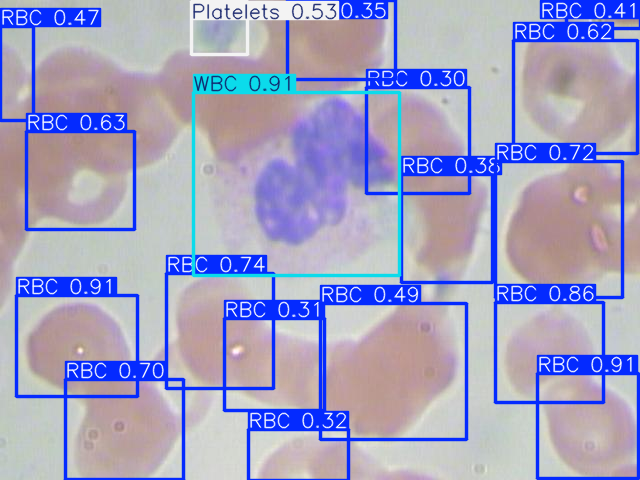

In [ ]:
res_plotted = results[0].plot()
cv2_imshow(res_plotted)

In [ ]:
model.export(format='onnx')  # ONNX format
model.export(format='torchscript')  # TorchScript format

Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (5.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 289.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 322.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 247.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 212.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 109.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 16.1s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: sli

'runs/detect/train2/weights/best.torchscript'

In [ ]:
print("\nModel training completed successfully!")
print(f"Best weights saved at: 'runs/detect/train/weights/best.pt'")
print("Model exported to ONNX and TorchScript formats for deployment")


Model training completed successfully!
Best weights saved at: 'runs/detect/train/weights/best.pt'
Model exported to ONNX and TorchScript formats for deployment


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
results = model.val()
print(f"Final mAP50-95: {results.box.map}")
print(f"Final mAP50: {results.box.map50}")
print(f"Final mAP75: {results.box.map75}")

Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/BCCD_Dataset/BCCD/labels/val.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]


                   all         87       1138      0.851      0.905      0.916      0.638
                   RBC         83        968      0.747      0.878      0.881      0.629
                   WBC         86         87      0.982          1       0.99      0.818
             Platelets         45         83      0.822      0.837      0.876      0.467
Speed: 1.9ms preprocess, 6.4ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val
Final mAP50-95: 0.6378826002060969
Final mAP50: 0.915764015648978
Final mAP75: 0.7149709280441746



0: 480x640 17 RBCs, 1 WBC, 1 Platelets, 15.3ms
Speed: 3.9ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


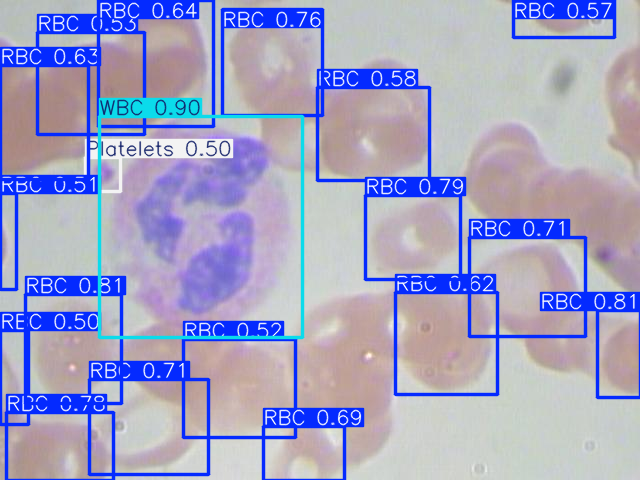


0: 480x640 22 RBCs, 1 WBC, 2 Plateletss, 16.0ms
Speed: 2.6ms preprocess, 16.0ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


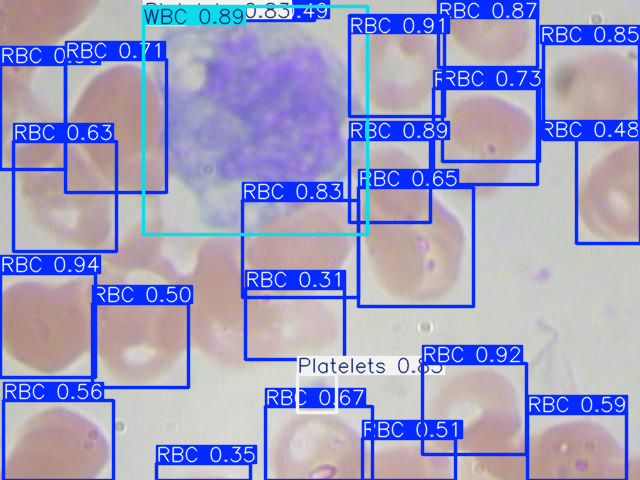


0: 480x640 21 RBCs, 1 WBC, 1 Platelets, 54.7ms
Speed: 2.3ms preprocess, 54.7ms inference, 14.7ms postprocess per image at shape (1, 3, 480, 640)


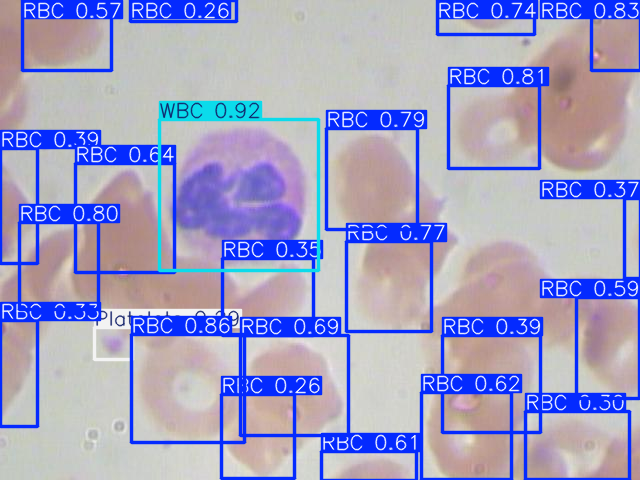


0: 480x640 26 RBCs, 1 WBC, 57.2ms
Speed: 2.1ms preprocess, 57.2ms inference, 9.9ms postprocess per image at shape (1, 3, 480, 640)


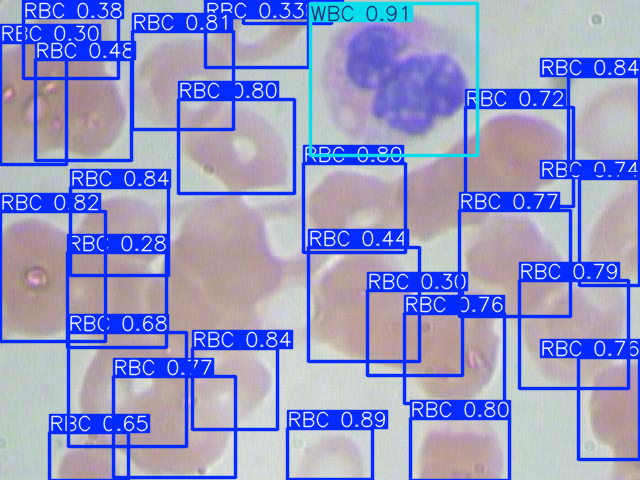

In [ ]:
for i in range(min(5, len(test_images))):
    if i == 0:  # Skip the first one as we already displayed it
        continue
    test_img_path = f"{dataset_path}/images/test/{test_images[i]}.jpg"
    if os.path.exists(test_img_path):
        img = cv2.imread(test_img_path)
        results = model(img)
        res_plotted = results[0].plot()
        cv2_imshow(res_plotted)
    else:
        print(f"File not found: {test_img_path}")

In [ ]:
!pip install gradio -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.2 MB/s eta 0:00:00
